<a href="https://colab.research.google.com/github/bomij33/ggmt/blob/main/deep_learning/mnist_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KERAS를 이용한 MNIST 

# <span style="color:blue">1. KERAS란</span>

### 초기에 ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System)라는 프로젝트의 ,<br/> 일환으로 개발된 파이썬 딥러닝 라이브러리로 TensorFLow, CNTK, 혹은 Theano와 함께 사용할 수 있다.

# <span style="color:blue">2. MNIST란</span>

### MNIST는 Modified National Institute of Standards and Technology database의 약자로
### 인공지능 연구의 권위자 LeCun교수가 만든 데이터 셋이고 <br> MNIST는 60,000개의 트레이닝 셋과 10,000개의 테스트 셋으로 이루어져 있고 이중 트레이닝 셋을 학습데이터로 <br> 사용하고 테스트 셋을 신경망을 검증하는 데에 사용합니다.
<br>


# **3. SETUP**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tabulate import tabulate

# **4. 모델을 만들기 위한 값 설정**
### <span style="color:blue">숫자 0~9(총10가지)</span>를 분류하는 모델을 만듬
### MNIST 데이터셋의 각 그림은 크기가 28X28 픽셀

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# **5. 데이터셋 불러오기 및 불러온 데이터 보기**
### 1) 데이터는 <br/><br/>훈련용데이터 : x_train, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 답이 맞는지 테스트 하기위한 데이터 : x_test
### 훈련용데이터의 답 : y_train, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 테스트용 데이터의 답 : y_test


In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### 2) 훈련용 데이터의 그림

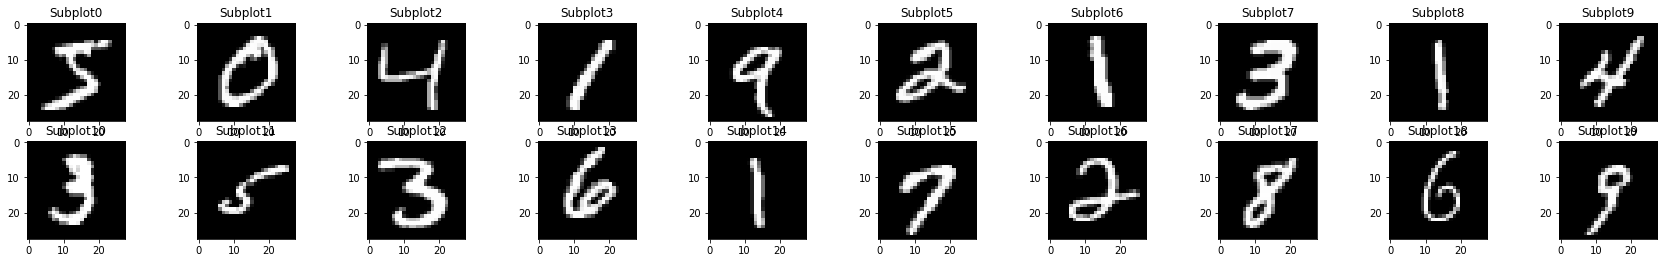

In [ ]:
rows = 2
cols = 10
axes=[]
fig=plt.figure(figsize=(30,30))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(x_train[a],cmap='gray')
#fig.tight_layout() 
plt.subplots_adjust(bottom=0.1,top=0.2)
plt.show()

### 3) 그림 데이터를 숫자로 바꿈
### 흰색이 0, 검정색이 255
### 30번째 데이터의 모습과, 30번째 답의 모습 출력

In [ ]:
print('x_train[30] data = \n', tabulate(x_train[30]))
print('y_train[30] data = ',y_train[30])

x_train[30] data = 
 -  -  -  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -  -  -  -  -
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  

# **6. 학습을 시키기 위한 데이터 사전 처리 과정**
### 1) "0에서 255까지"의 분포 값을 0~1 사이의 값으로 바꿈

In [ ]:
# 전처리 작업 : 특성 무시하는 % 개념의 값으로 변경. => 정규화 과정 : 계산 쉽고, 이해 쉬움 
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print('x_train[30] data = \n', tabulate(x_train[30]))

x_train[30] data = 
 -  -  -  --------  --------  ---------  ---------  --------  --------  --------  ---------  --------  --------  --------  ---------  ---------  --------  ---------  --------  --------  --------  ----------  ---------  -  -  -  -  -
0  0  0  0         0         0          0          0         0         0         0          0         0         0         0          0          0         0          0         0         0         0           0          0  0  0  0  0
0  0  0  0         0         0          0          0         0         0         0          0         0         0         0          0          0         0          0         0         0         0           0          0  0  0  0  0
0  0  0  0         0         0          0          0         0         0         0          0         0         0         0          0          0         0          0         0         0         0           0          0  0  0  0  0
0  0  0  0         0         0          0          

### 2) 전체 훈련과 테스트 데이터를 1개의 배열에 넣음

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **7. 모델을 구성하기**
### 딥러닝의 하나인 <span style="color:blue">CNN(합성곱 신경망)</span>을 사용

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

# **8. 학습시키기**

### batcg_size : 한번에 불러 올 데이터(그림)의 수
### epochs : 학습 시키는 횟 수

In [ ]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 3s 6ms/step - loss: 0.0093 - acc: 0.9966 - val_loss: 0.0393 - val_acc: 0.9928
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0396 - val_acc: 0.9932
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0423 - val_acc: 0.9928
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0105 - acc: 0.9963 - val_loss: 0.0385 - val_acc: 0.9932
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0394 - val_acc: 0.9932
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0390 - val_acc: 0.9935
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0389 - val_acc: 0.9935
Epoch 8/100
422/422 [==============================] - 2s 5ms/step - 

# **9. 학습된 모델 평가하기**

### 얼마의 정확도를 가지는지

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02612636797130108
Test accuracy: 0.9937999844551086


### 정확도와 손실을 그래프로 보기

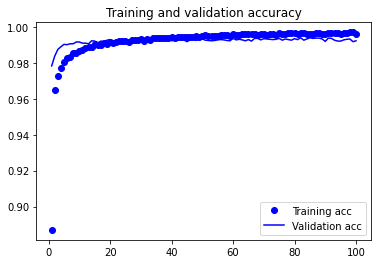

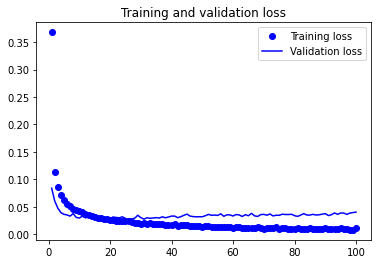

In [ ]:
acc      = hist.history['acc']
val_acc  = hist.history['val_acc']
val_loss = hist.history['val_loss']
loss     = hist.history['loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **10. 모델 저장**
###생성된 모델 저장하기

In [ ]:
model.save('./my_mnist.h5')

# **11. 자신의 글씨를 맞추어 보기**

### 얼마의 정확도를 가지는지?

In [ ]:
import glob
import cv2
path = glob.glob('/content/test-img/' +'*.png') 
cv_img = []

for img in path:
    n = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    n = cv2.resize(n, dsize=(28, 28), interpolation=cv2.INTER_AREA)
    cv_img.append(n/255.0)
p_data = np.array(cv_img,dtype='float32')

In [ ]:
# from keras.models import load_model
# model = load_model('./my_mnist.h5') 

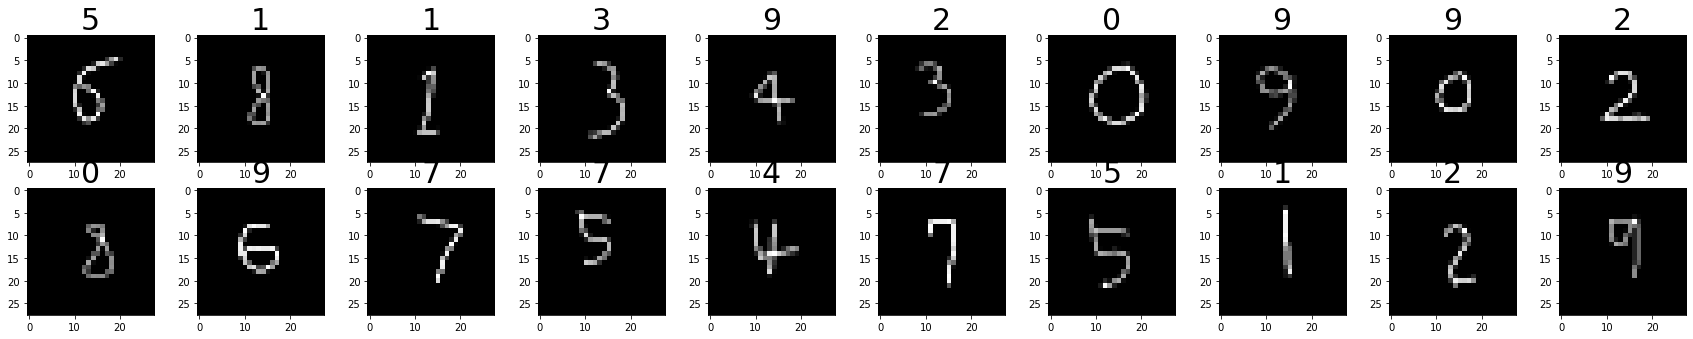

In [ ]:
rows = int(len(path)/10)+1
cols = 10
axes=[]
fig=plt.figure(figsize=(30,30))

for a in range(len(path)):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    img = p_data[a].reshape(1, 28, 28, 1)
    answer = np.argmax(model.predict(img))
    subplot_title=(answer)
    axes[-1].set_title(subplot_title, fontsize=30)  
    plt.imshow(p_data[a],cmap='gray')
plt.subplots_adjust(bottom=0.1,top=0.3)
plt.show()


